In [1]:
#This project is a case study about different kind of boats and their specificities. The two main questions 
#I want to answer are : 

#Is it the most expensive boats that get the most views?

#Are there common features among the most viewed boats?

#First of all, we import the data from the given csv file and take a look at it.

import pandas as pd
df=pd.read_csv('boat_data.csv')
df.head()


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [2]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


None

In [3]:
#All columns seem to be useful for the analysis, but we can see that there are multiple currencies 
#in the "Price" column, and the data provided can not be used in the current state, so we have to clean it in order 
#to get equivalent prices for each boat. The steps are :

#1) Select the "Price" column and take only the first three letters who seem to be the type of currency used for 
# each price.

df['money']=df['Price'].str[:3]
print(df['money'].value_counts())


EUR    8430
CHF     980
Â£      298
DKK     180
Name: money, dtype: int64


In [4]:
#2) Then we select only the prices of each boat, which seem to be the second part of the same column, and name it
# "New Price".

df['New Price']= df['Price'].str[4:]
df['New Price'].head()

0     3337
1     3490
2     3770
3    25900
4     3399
Name: New Price, dtype: object

In [5]:
#3) The new column must be transformed into a numerical type, in order to be able to realize calculations
#on it. We will name this new column "Real Price".

df['Real Price']=pd.to_numeric(df['New Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  money                        9888 non-null   object 
 11  New Price                    9888 non-null   object 
 12  Real Price                   9888 non-null   int64  
dtypes: float64(2), int

In [6]:
#4)In order to have the same scale for each price, we can convert each kind of price to a price in U.S. dollars.

df.loc[df.money == 'CHF', 'USD'] = (df['Real Price']) * 1.04
df.loc[df.money == 'DKK', 'USD'] = (df['Real Price']) * 0.14
df.loc[df.money == 'EUR', 'USD'] = (df['Real Price']) * 1.07
df.loc[df.money == 'Â£ ', 'USD'] = (df['Real Price']) * 1.17


In [7]:
#5)Then we round the new column converted and change its type to integer.
df['USD']= round(df['USD']).astype('int')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,money,New Price,Real Price,USD
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF,3337,3337,3470
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR,3490,3490,3734
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF,3770,3770,3921
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK,25900,25900,3626
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR,3399,3399,3637


Text(0.5, 1.0, 'Distribution of values of each boat vs number of views')

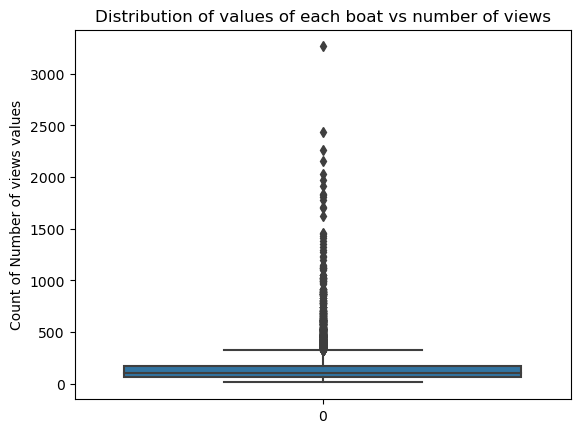

In [8]:
#6)Now we can take a look at the different relations between the prices of the boats and 
# each feature provided. We can use the seaborn module in order to realize efficient data visualization.

#First we can observe the distribution of the values in the column 'Number of views last 7 days' by making
#a boxplot of this column.

import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(df['Number of views last 7 days'])
plt.ylabel('Count of Number of views values')
plt.title("Distribution of values of each boat vs number of views")

In [9]:
#7)It seems like the majority of the values are below 500, so in order to find the answers we are looking for, 
#we are going to analyze all the values above 500, then sort the result 
#by the values of the column 'Number of views last 7 days'
df_most_viewed = df.loc[df['Number of views last 7 days'] > 500]
df_most_viewed = df_most_viewed.sort_values(by = 'Number of views last 7 days', ascending = False)
df_most_viewed.head()


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,money,New Price,Real Price,USD
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland,3263,CHF,14900,14900,15496
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland,2432,CHF,35000,35000,36400
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland,2261,CHF,125900,125900,130936
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt,2154,EUR,949000,949000,1015430
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland,2026,CHF,19900,19900,20696


In [10]:
#We can take a look at the dataframe we just created
df_most_viewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 9580 to 8623
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        278 non-null    object 
 1   Boat Type                    278 non-null    object 
 2   Manufacturer                 263 non-null    object 
 3   Type                         278 non-null    object 
 4   Year Built                   278 non-null    int64  
 5   Length                       278 non-null    float64
 6   Width                        278 non-null    float64
 7   Material                     266 non-null    object 
 8   Location                     278 non-null    object 
 9   Number of views last 7 days  278 non-null    int64  
 10  money                        278 non-null    object 
 11  New Price                    278 non-null    object 
 12  Real Price                   278 non-null    int64  
 13  USD             

Text(0.5, 1.0, 'Price in USD of each boat vs Number of views the last seven days')

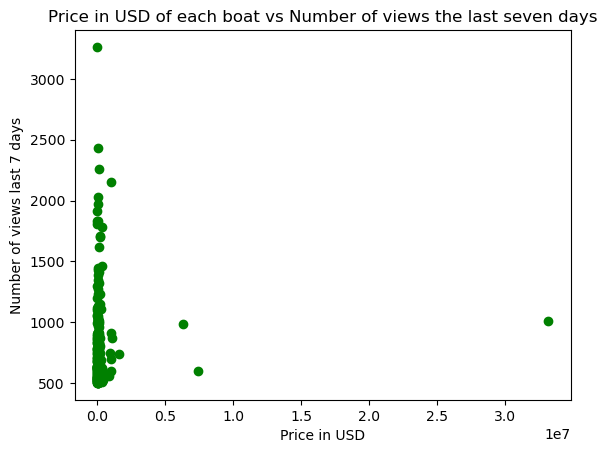

In [11]:
#8)We can use a scatterplot in order to see the coorelation between the'Number of views last 7 days' column and
#the 'USD' column
plt.scatter(x='USD',y='Number of views last 7 days',data=df_most_viewed,c='green')
plt.xlabel('Price in USD')
plt.ylabel('Number of views last 7 days')
plt.title('Price in USD of each boat vs Number of views the last seven days')

In [12]:
#=> The answer to the first question we asked ourselves : "Is it the most expensive boats that get the most views?
#seems to be "No", but in order to be more specific about the definition "most expensive", we should take a closer
#look at the data near the vertical axis.
#We select only the part of the dataframe where the boat prices are under 2 million dollars
df_most_viewed_bis=df_most_viewed[df_most_viewed['USD'] < 2000000]


Text(0.5, 1.0, 'Price in USD of each boat vs Number of views the last seven days')

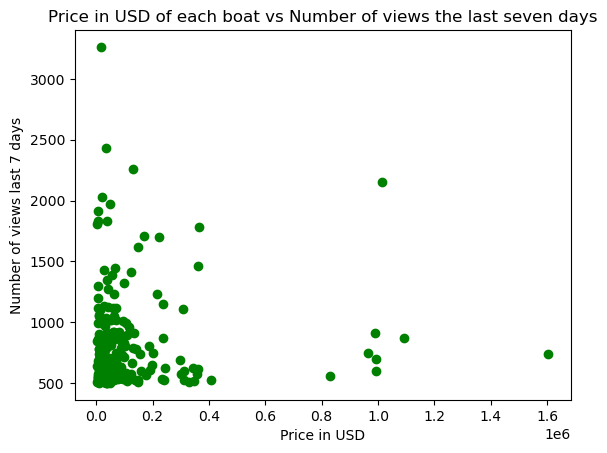

In [13]:
#We use a scatterplot one more time in order to observe the results.

plt.scatter(x='USD',y='Number of views last 7 days',data=df_most_viewed_bis,c='green')
plt.xlabel('Price in USD')
plt.ylabel('Number of views last 7 days')
plt.title('Price in USD of each boat vs Number of views the last seven days')

In [14]:
#It seems there is no correlation at all between the price of a boat and its number of views.
#The correlation score validate this hypothesis (the first value represent the correlation score : if it is close to 0
#there is almost no correlation between the two features we selected).
from scipy import stats
stats.pearsonr(df_most_viewed_bis['USD'], df_most_viewed_bis['Number of views last 7 days'])

(0.0687311635047172, 0.25598606553487324)

In [15]:
#Now we can try to find the answer to the second problematic : Are there common features among the most viewed boats?
#We can reuse the last dataframe we created 'df_most_viewed_bis' and filter it with a value that will specify the 
#definition 'Most wiewed boats'. Here I decided to take all the boats that have more that 1000 'Number of views last
#7 days', but it is up to everyone to choose this value threshold. I will call this new dataframe 'df2' in order 
#to have a variable with a short name.

df2=df_most_viewed_bis[df_most_viewed_bis['Number of views last 7 days']> 1000]
df2.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,money,New Price,Real Price,USD
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland,3263,CHF,14900,14900,15496
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland,2432,CHF,35000,35000,36400
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland,2261,CHF,125900,125900,130936
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt,2154,EUR,949000,949000,1015430
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland,2026,CHF,19900,19900,20696


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 9580 to 1654
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        44 non-null     object 
 1   Boat Type                    44 non-null     object 
 2   Manufacturer                 41 non-null     object 
 3   Type                         44 non-null     object 
 4   Year Built                   44 non-null     int64  
 5   Length                       44 non-null     float64
 6   Width                        44 non-null     float64
 7   Material                     41 non-null     object 
 8   Location                     44 non-null     object 
 9   Number of views last 7 days  44 non-null     int64  
 10  money                        44 non-null     object 
 11  New Price                    44 non-null     object 
 12  Real Price                   44 non-null     int64  
 13  USD              

<Axes: xlabel='Type', ylabel='count'>

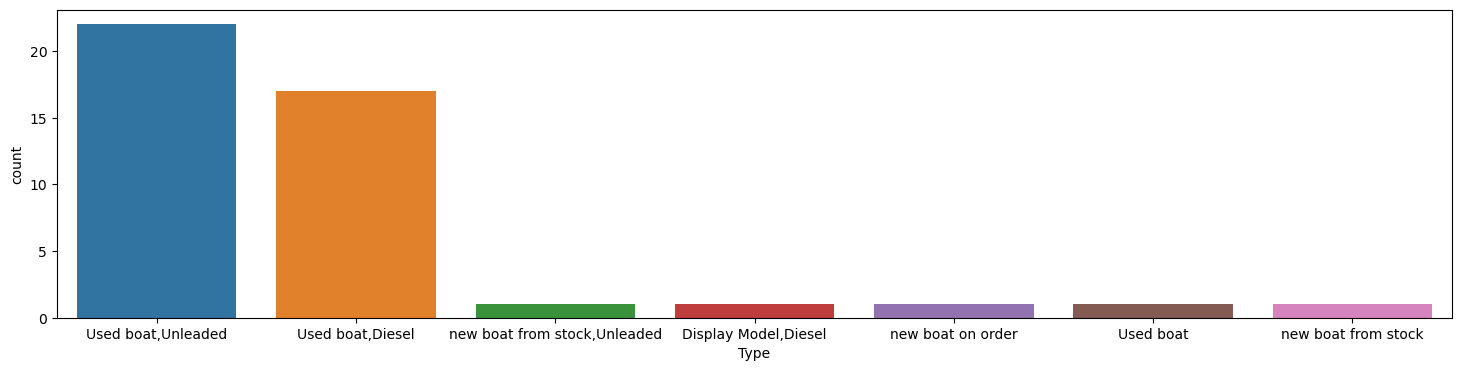

In [17]:
#Now we can take a look at their different caracteristics that can influence the answer to our question.
#In the previous scatterplot, we already saw that there is no real correlation between the price and the number of views.
#We can use different visualization in order to analyze the correlation between the other features. We will use each
#time the seaborn module for the visualization of the data.

df2_bis = df2.loc[:,['Boat Type','Manufacturer','Type','Year Built','Length','Width','Material','Location','Number of views last 7 days']]

#First let's take a look at the 'Type' feature.

from matplotlib.pyplot import figure

figure(figsize=(18, 4))
sns.countplot(df2_bis,x='Type')


<Axes: xlabel='Material', ylabel='count'>

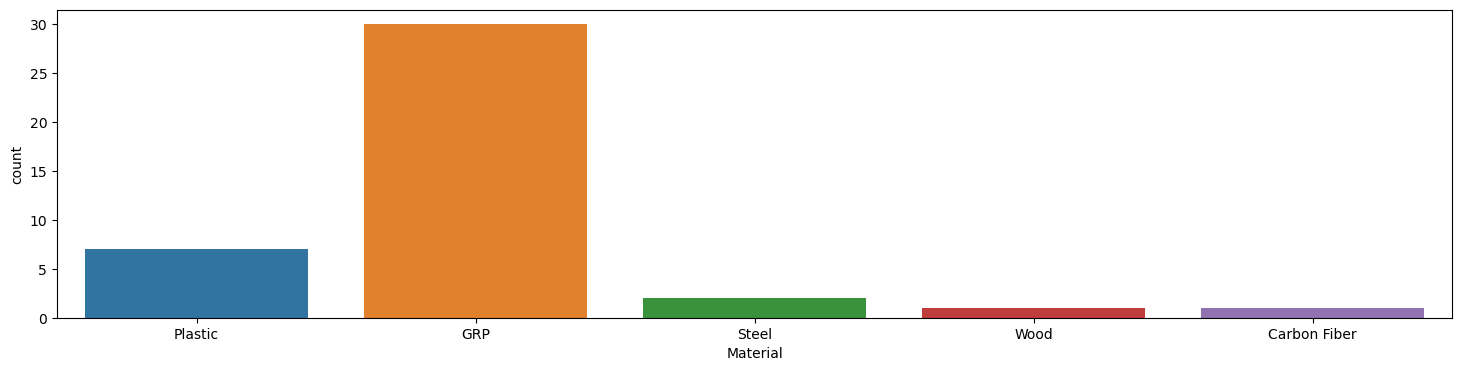

In [18]:
#Then the 'Material' feature.

figure(figsize=(18, 4))
sns.countplot(df2_bis,x='Material')

<Axes: xlabel='Location', ylabel='count'>

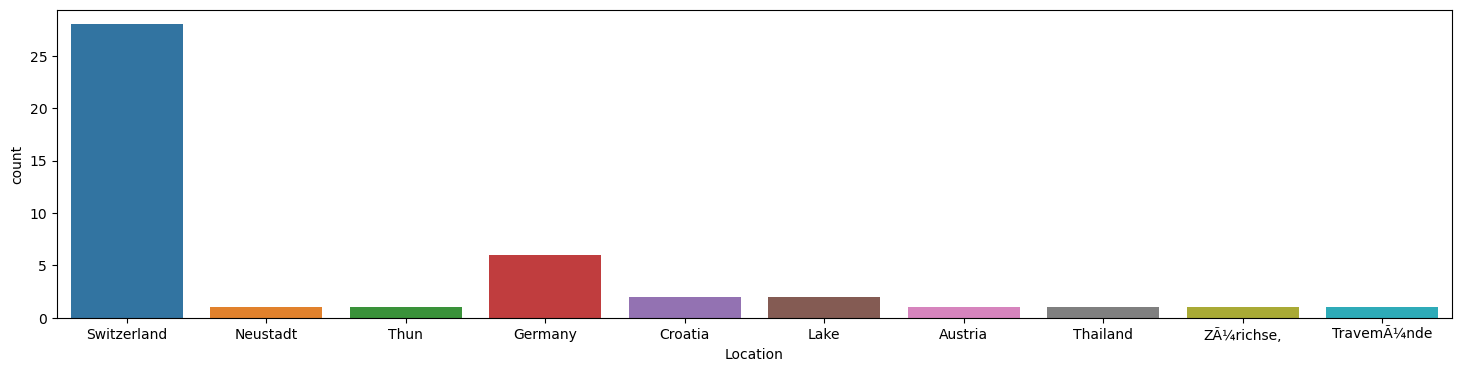

In [19]:
# The'Location' feature.

figure(figsize=(18, 4))
sns.countplot(df2_bis,x='Location')

In [26]:
#The'Manufacturer' feature has too many different values, this is why it is useless to count on this feature in order 
#to find a coorelation between the 'Manufacturer' feature and the number of views.

df2_bis['Manufacturer'].value_counts()

Sunseeker power boats         3
Sea Ray power boats           3
Princess power boats          3
Windy power boats             2
Malibu power boats            2
Viper power boats             2
Correct Craft power boats     2
Fairline power boats          2
BÃ©nÃ©teau power boats        2
Century power boats           1
Nautique power boats          1
Fjord power boats             1
Bayliner power boats          1
Storebro power boats          1
Galeon power boats            1
Regal power boats             1
Stingray power boats          1
Rio power boats               1
Stama power boats             1
Fiberline power boats         1
Jeanneau power boats          1
Smartliner power boats        1
De Boarnstream power boats    1
Bavaria power boats           1
Draco power boats             1
Baha power boats              1
Tullio Abbate power boats     1
Pershing power boats          1
Quicksilver power boats       1
Name: Manufacturer, dtype: int64

In [28]:
#Since there is a lot of different boat types, i decided to choose the five most common types of boats, in order to have a clean histogram. 
Most_boat_type = df2_bis['Boat Type'].value_counts()[:5]
Most_boat_type

Sport Boat            9
Cabin Boat            8
Motor Yacht           6
Hardtop               4
Wakeboard/Wakesurf    3
Name: Boat Type, dtype: int64

Text(0.5, 1.0, 'Histogram of the Five Most Watched Boat Type')

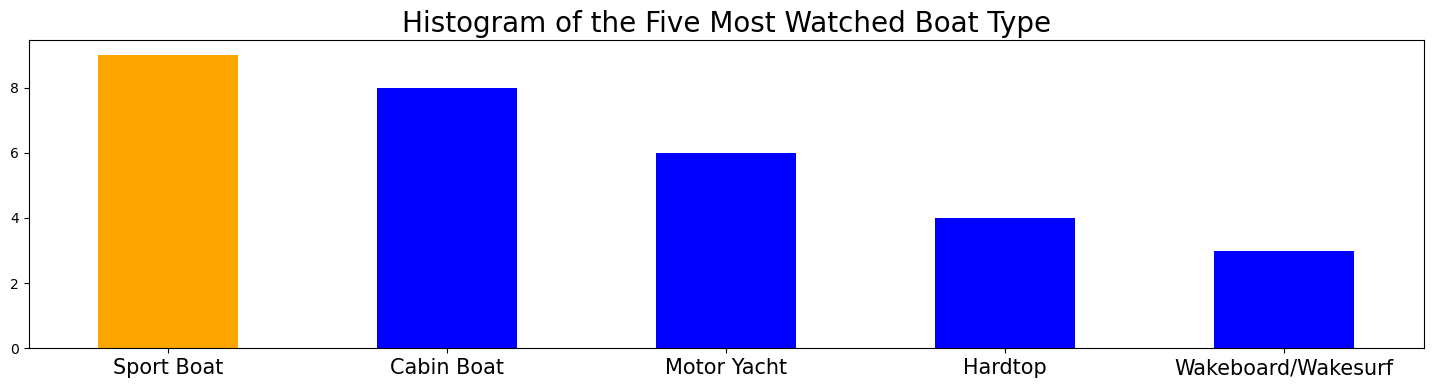

In [48]:
#The new 'Boat Type' feature as a barplot
figure(figsize=(18, 4))
Most_boat_type.plot(kind='bar',color=['orange','blue','blue','blue','blue'])
plt.xticks(rotation=360,size=15)
plt.title('Histogram of the Five Most Watched Boat Type',size=20)

Text(0.5, 1.0, 'Number of views the last seven days depending on the year the boats were built')

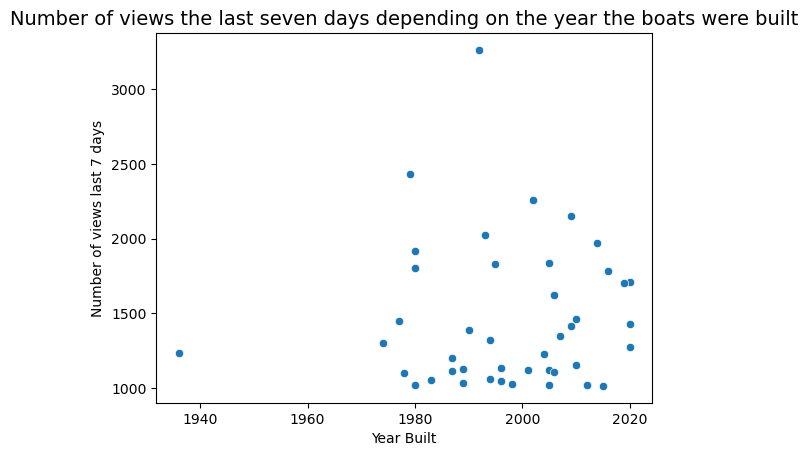

In [53]:
#Here we can look at the scatterplot the Number of views the last seven days depending on the 'Year Built' feature.
sns.scatterplot(df2_bis,x='Year Built',y='Number of views last 7 days')
plt.title('Number of views the last seven days depending on the year the boats were built', size = 14)

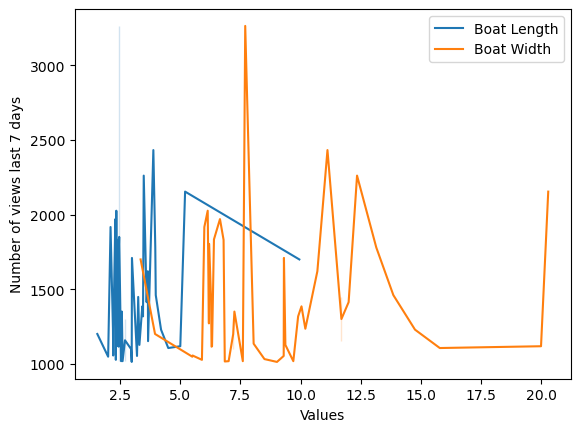

In [24]:
#And finally the 'Width' and the 'Length' features, that we can put on the same lineplot since they both have the same
#value scale.
fig, ax = plt.subplots()

sns.lineplot(df2_bis,x='Width',y='Number of views last 7 days',label = 'Boat Length')
sns.lineplot(df2_bis,x='Length',y='Number of views last 7 days',label = 'Boat Width')
ax.set_xlabel('Values')
plt.legend()

In [25]:
#After this analysis, we can conclude that the common features among the most viewed boats are all the features except the
#'Manufacturer' one, which has 29 different values

#We can assert that the most viewed boats :
# - are located in Switzerland (28 out of 44 boats)
# - are made up of GRP (fibreclass) (30 out of 44)
# - are built after 1970 (which is quite normal)
# - are Sport Boats, Cabin Boats, Motor Yacht or Hardtop boats
# - are Used Boats, that use Unleaded Gas (22 out of 44) or Diesel (17 out of 44)
# - and finally have a length between 2 and 4 meters and a width between 6 and 12 meters, with a hallow between 8 and 9
# meters.


